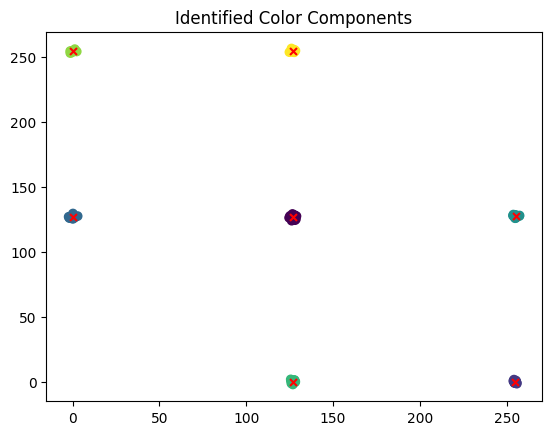

[[[ 1.19754533 -0.01923169]
  [-0.01923169  1.70463777]]

 [[ 0.38531507 -0.21305776]
  [-0.21305776  0.64412607]]

 [[ 1.6740466   0.30152784]
  [ 0.30152784  0.89468541]]

 [[ 1.02962802 -0.03525602]
  [-0.03525602  0.57207645]]

 [[ 0.72802356  0.03254854]
  [ 0.03254854  1.04653338]]

 [[ 1.63856537  0.49894624]
  [ 0.49894624  0.65573231]]

 [[ 1.09300903  0.05372962]
  [ 0.05372962  0.93233538]]] [[ 1.27172922e+02  1.26605367e+02]
 [ 2.54828851e+02 -2.08589583e-01]
 [ 9.95904977e-02  1.26934805e+02]
 [ 2.55165668e+02  1.27358500e+02]
 [ 1.27065742e+02 -8.44575440e-02]
 [ 2.67439699e-01  2.54518161e+02]
 [ 1.26931688e+02  2.54851953e+02]]


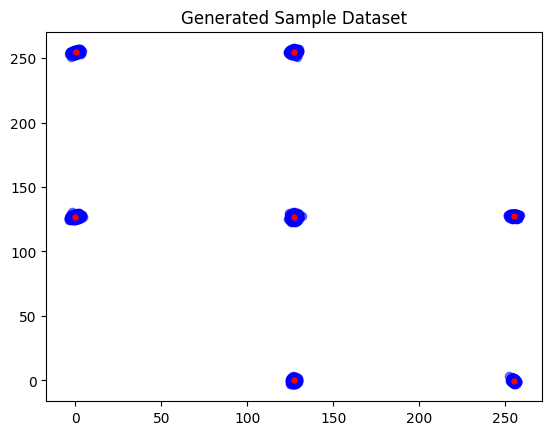

In [1]:
import numpy as np
import pickle
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Step 1: Identify Likely Color Components
def identify_color_components(data, n):
  # Fit a GMM model to the data
  gmm = GaussianMixture(n_components=n)
  gmm.fit(data)
  
  # Get the means and covariances of the components
  means = gmm.means_
  covariances = gmm.covariances_
  
  # Visualize the results
  plt.scatter(data[:, 0], data[:, 1], c=gmm.predict(data), cmap='viridis')
  plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=25)
  plt.title('Identified Color Components')
  plt.show()
  
  return means, covariances

# Step 2: Create a Function to Generate Sample Data
def generate_sample_dataset(n, means, covariances, num_samples=1000):
  # Generate random samples for each component
  samples = []
  for i in range(n):
    component_samples = np.random.multivariate_normal(means[i], covariances[i], num_samples)
    samples.append(component_samples)
  
  # Combine the samples
  dataset = np.vstack(samples)
  
  return dataset

# Load data from colors.pkl
with open('SMAI-Dataset-problem-4.3/colors.pkl', 'rb') as file:
  data = pickle.load(file)

# Set the number of components given: 7
n = 7

# Identify likely color components
identified_means, identified_covariances = identify_color_components(data, n)
print(identified_covariances, identified_means)

# Generate a sample dataset based on the identified components
generated_dataset = generate_sample_dataset(n, identified_means, identified_covariances)

# Visualize the generated dataset
plt.scatter(generated_dataset[:, 0], generated_dataset[:, 1], c='blue', alpha=0.5)
plt.scatter(identified_means[:, 0], identified_means[:, 1], c='red', marker='.', s=50)
plt.title('Generated Sample Dataset')
plt.show()

#### Observations:

- The "Identified Color Components" plot shows how the GMM algorithm has clustered the original data into 7 likely color components. Each component is associated with a distinct color group.

- In the "Generated Sample Dataset" plot, we can see that the generated dataset closely resembles the distribution of colors observed in the original data. This suggests that the GMM successfully captured the underlying color patterns in the dataset.

- The generated dataset provides a way to simulate new data points that follow the same color patterns as the original dataset. This can be useful for various applications, such as data augmentation or color synthesis.

Overall, the code effectively identifies color components in the dataset and generates a sample dataset that reflects the identified color distributions. This can be a valuable tool for analyzing and generating color data in various image processing tasks.
